### Online Retail

#### Features - 
1. InvoiceNo
2. StockCode
3. Description
4. Quantity
5. Invoice_Date
6. UnitPrice
7. CustomerID
8. Country

#### Questions - 
1. Based on your understanding of the data, what kind of business is this company in?
2. Analyze the sales performance of this company, and provide your insights regarding the same.
3. Based on your analysis of the data, what are potential areas of improvement for the business?
4. What are additional business problems that can be analyzed using this data. Support with explanation

##### The answers are provided below with proper analysis. Could have further more analyzed the data, but felt this was good enough for the test. Can do better analysis if needed.

In [1]:
#Library

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

%matplotlib inline

In [2]:
# fetch data from excel

df = pd.read_excel("Online Retail.xlsx")

In [3]:
# retrieve top 10 rows

df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [4]:
# Rearrange the column names

df =df[['CustomerID','InvoiceNo','StockCode','Quantity','UnitPrice','Description','InvoiceDate','Country']]

In [5]:
df.head()

,CustomerID,InvoiceNo,StockCode,Quantity,UnitPrice,Description,InvoiceDate,Country
0,17850.0,536365,85123A,6,2.55,WHITE HANGING HEART T-LIGHT HOLDER,2010-12-01 08:26:00,United Kingdom
1,17850.0,536365,71053,6,3.39,WHITE METAL LANTERN,2010-12-01 08:26:00,United Kingdom
2,17850.0,536365,84406B,8,2.75,CREAM CUPID HEARTS COAT HANGER,2010-12-01 08:26:00,United Kingdom
3,17850.0,536365,84029G,6,3.39,KNITTED UNION FLAG HOT WATER BOTTLE,2010-12-01 08:26:00,United Kingdom
4,17850.0,536365,84029E,6,3.39,RED WOOLLY HOTTIE WHITE HEART.,2010-12-01 08:26:00,United Kingdom


In [6]:
# Data Preprocessing

df.isnull().sum()

CustomerID     135080
InvoiceNo           0
StockCode           0
Quantity            0
UnitPrice           0
Description      1454
InvoiceDate         0
Country             0
dtype: int64

In [7]:
df.nunique()

CustomerID      4372
InvoiceNo      25900
StockCode       4070
Quantity         722
UnitPrice       1630
Description     4223
InvoiceDate    23260
Country           38
dtype: int64

### 1. Based on your understanding of the data, what kind of business is this company in?

#### Answer -  As the name suggests this company is more into online retail across 38 countries like

'United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany','Norway', 'EIRE', 'Switzerland', 'Spain',
'Poland','Portugal','Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland','Channel Islands', 'Denmark', 'Cyprus',
'Sweden', 'Austria','Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore','Lebanon', 'United Arab Emirates', 'Saudi Arabia','Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA','European Community', 'Malta', 'RSA

### 2. Analyze the sales performance of this company, and provide your insights regarding the same.

In [8]:
# Create column TotalAmount and calculate TotalAmount of sales
TotalAmount = df['Quantity'] * df['UnitPrice']

# insert the TotalAmount column in column 5
df.insert(loc=5, column='TotalAmount', value=TotalAmount)

In [9]:
#Rearrange column names and exclude description
df1 = df[['CustomerID','InvoiceNo','StockCode','Quantity','UnitPrice','TotalAmount','InvoiceDate','Country']]

# creating a copy of new dataframe
new_df = df1.copy()

In [10]:
new_df.head()

,CustomerID,InvoiceNo,StockCode,Quantity,UnitPrice,TotalAmount,InvoiceDate,Country
0,17850.0,536365,85123A,6,2.55,15.30,2010-12-01 08:26:00,United Kingdom
1,17850.0,536365,71053,6,3.39,20.34,2010-12-01 08:26:00,United Kingdom
2,17850.0,536365,84406B,8,2.75,22.00,2010-12-01 08:26:00,United Kingdom
3,17850.0,536365,84029G,6,3.39,20.34,2010-12-01 08:26:00,United Kingdom
4,17850.0,536365,84029E,6,3.39,20.34,2010-12-01 08:26:00,United Kingdom


### Exploratory Data Analysis (EDA)

In [11]:
# Grouping countries by TotalAmount of Sales.

country_price = new_df.groupby('Country')['Quantity'].sum().sort_values(ascending = False)

country_price

Country
United Kingdom          4263829
Netherlands              200128
EIRE                     142637
Germany                  117448
France                   110480
Australia                 83653
Sweden                    35637
Switzerland               30325
Spain                     26824
Japan                     25218
Belgium                   23152
Norway                    19247
Portugal                  16180
Finland                   10666
Channel Islands            9479
Denmark                    8188
Italy                      7999
Cyprus                     6317
Singapore                  5234
Austria                    4827
Hong Kong                  4769
Israel                     4353
Poland                     3653
Unspecified                3300
Canada                     2763
Iceland                    2458
Greece                     1556
USA                        1034
United Arab Emirates        982
Malta                       944
Lithuania                   652


<AxesSubplot:xlabel='Country'>

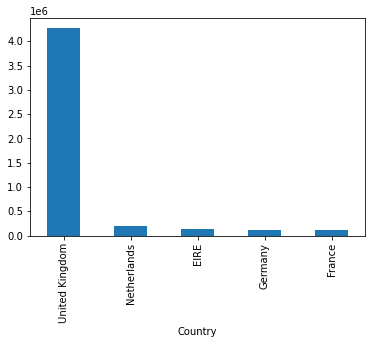

In [12]:
# Top 5 countries with high number of purchase

country_price[:5].plot(kind='bar')

<AxesSubplot:xlabel='Country'>

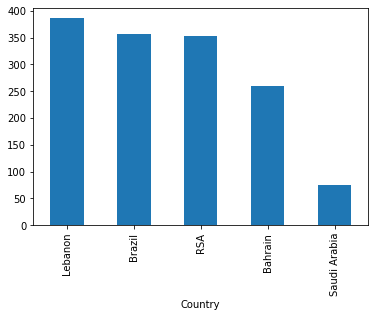

In [13]:
# Bottom 5 countries with least number of purchases

country_price[33:].plot(kind='bar')

In [14]:
# Adding feature to the dataset

timest = new_df['InvoiceDate'].dt.year
new_df['Year'] = timest

new_df.head()

,CustomerID,InvoiceNo,StockCode,Quantity,UnitPrice,TotalAmount,InvoiceDate,Country,Year
0,17850.0,536365,85123A,6,2.55,15.30,2010-12-01 08:26:00,United Kingdom,2010
1,17850.0,536365,71053,6,3.39,20.34,2010-12-01 08:26:00,United Kingdom,2010
2,17850.0,536365,84406B,8,2.75,22.00,2010-12-01 08:26:00,United Kingdom,2010
3,17850.0,536365,84029G,6,3.39,20.34,2010-12-01 08:26:00,United Kingdom,2010
4,17850.0,536365,84029E,6,3.39,20.34,2010-12-01 08:26:00,United Kingdom,2010


<AxesSubplot:xlabel='Year'>

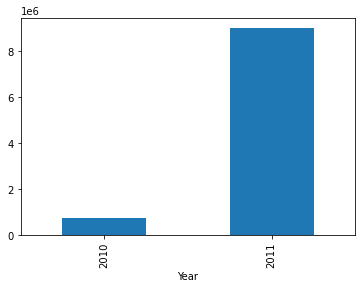

In [15]:
# TotalAmount of Sales for different years

new_df.groupby('Year')['TotalAmount'].sum().plot(kind='bar')

<AxesSubplot:title={'center':'Sales by month'}, xlabel='Mon,Year'>

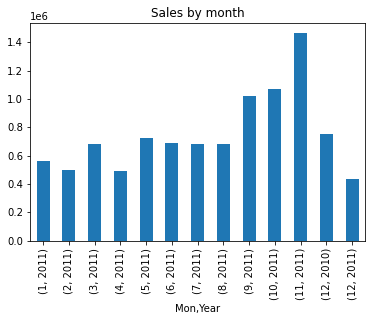

In [16]:
# sales for different months

new_df['Mon'] = new_df['InvoiceDate'].dt.month
new_df['Month'] = new_df['InvoiceDate'].dt.month_name()
new_df.groupby(['Mon','Year'])['TotalAmount'].sum().plot(kind='bar', title='Sales by month')

In [17]:
# Checking why dec 2011 has a huge drop to nov 2011

get_2011 = new_df[(new_df['Year'] == 2011)]
get_dec2011 = get_2011[(new_df['Month'] == 'December')]
get_dec2011 = get_dec2011['InvoiceDate'].dt.date.unique()
get_dec2011

<ipython-input-17-57b466dc6d51>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  get_dec2011 = get_2011[(new_df['Month'] == 'December')]


array([datetime.date(2011, 12, 1), datetime.date(2011, 12, 2),
       datetime.date(2011, 12, 4), datetime.date(2011, 12, 5),
       datetime.date(2011, 12, 6), datetime.date(2011, 12, 7),
       datetime.date(2011, 12, 8), datetime.date(2011, 12, 9)],
      dtype=object)

### Answer :

#### Performance Analysis
Sales Performance can be seen with

1. Number of Sales every month.
2. Number of Sales every year.
3. We can see that in 2010 we only have sales for Dec and in 2011 all months are included.
4. We can see that Sept to Nov we have a very good sales.
5. We could also see that we have a huge drop of sales from Nov 2011 to Dec 2011, when analyzed it was found that we only have data upto the 9th on DEC 2011, hence we find a huge sale drop in the month of Dec 2011 compared to Nov 2011.

### 3. Based on your analysis of the data, what are potential areas of improvement for the business? 

In [18]:
new_df.head()

,CustomerID,InvoiceNo,StockCode,Quantity,UnitPrice,TotalAmount,InvoiceDate,Country,Year,Mon,Month
0,17850.0,536365,85123A,6,2.55,15.30,2010-12-01 08:26:00,United Kingdom,2010,12,December
1,17850.0,536365,71053,6,3.39,20.34,2010-12-01 08:26:00,United Kingdom,2010,12,December
2,17850.0,536365,84406B,8,2.75,22.00,2010-12-01 08:26:00,United Kingdom,2010,12,December
3,17850.0,536365,84029G,6,3.39,20.34,2010-12-01 08:26:00,United Kingdom,2010,12,December
4,17850.0,536365,84029E,6,3.39,20.34,2010-12-01 08:26:00,United Kingdom,2010,12,December


In [19]:
#dropping missing values
#checking the sum of missing values (if any)

new_df = new_df.dropna()
new_df.isnull().sum()

CustomerID     0
InvoiceNo      0
StockCode      0
Quantity       0
UnitPrice      0
TotalAmount    0
InvoiceDate    0
Country        0
Year           0
Mon            0
Month          0
dtype: int64

<AxesSubplot:title={'center':'Most Customers for country'}, xlabel='Country'>

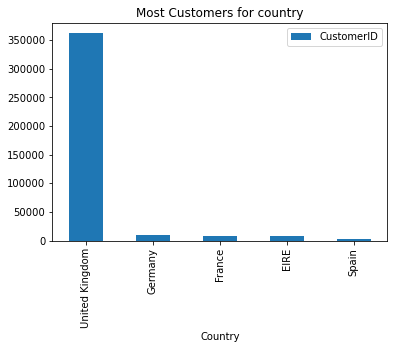

In [20]:
# Countries with the most number of customers

cust_id = pd.DataFrame(new_df.groupby('Country')['CustomerID'].count().sort_values(ascending=False))

cust_id[:5].plot(kind='bar', title='Most Customers for country')

<AxesSubplot:title={'center':'Least Customers for country'}, xlabel='Country'>

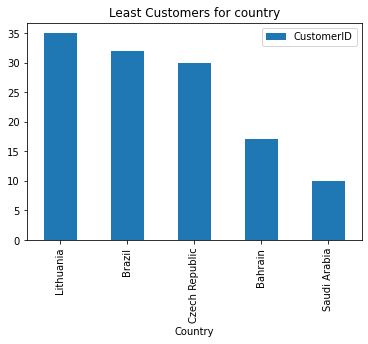

In [21]:
# Countries with least customers

cust_id[-5:].plot(kind='bar', title='Least Customers for country')

#### Answer - 

1. We see that Sept to Dec we have very high sales.
2. We can concentrate on improving the sales for the other 8 months.
3. We find very less number of customers in Lithania, Brazil, Czech Republic, Bahrain and Saudi Arabia.
4. We have very sales for Lebanion, Brazil, RSA, Bahrain, Saudi Arabia. we can concentrate on improving sales.

##### Therefore, we could improve the business by increasing the customers and sale point of view.

### 4. What are additional business problems that can be analyzed using this data. Support with explanation

In [22]:
# Removing the null values since we are checking the data based on customer and description.

new_df2 = df.dropna()
new_df2.isnull().sum()
new_df2.head()

,CustomerID,InvoiceNo,StockCode,Quantity,UnitPrice,TotalAmount,Description,InvoiceDate,Country
0,17850.0,536365,85123A,6,2.55,15.30,WHITE HANGING HEART T-LIGHT HOLDER,2010-12-01 08:26:00,United Kingdom
1,17850.0,536365,71053,6,3.39,20.34,WHITE METAL LANTERN,2010-12-01 08:26:00,United Kingdom
2,17850.0,536365,84406B,8,2.75,22.00,CREAM CUPID HEARTS COAT HANGER,2010-12-01 08:26:00,United Kingdom
3,17850.0,536365,84029G,6,3.39,20.34,KNITTED UNION FLAG HOT WATER BOTTLE,2010-12-01 08:26:00,United Kingdom
4,17850.0,536365,84029E,6,3.39,20.34,RED WOOLLY HOTTIE WHITE HEART.,2010-12-01 08:26:00,United Kingdom


In [23]:
# Sales Average for each Product

avg_sales = new_df2.groupby(['Country','Description'])['Quantity','TotalAmount'].mean().sort_values(by='Quantity', ascending=False)

avg_sales

<ipython-input-23-b87d97ee45b1>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avg_sales = new_df2.groupby(['Country','Description'])['Quantity','TotalAmount'].mean().sort_values(by='Quantity', ascending=False)


,,Quantity,TotalAmount
Country,Description,,
EIRE,ASSORTED INCENSE PACK,1440.0,230.40
United Kingdom,TEA TIME TEA TOWELS,1300.0,3022.50
EIRE,"ASSORTED FLOWER COLOUR ""LEIS""",960.0,403.20
Netherlands,GINGHAM HEART DECORATION,936.0,673.92
Sweden,12 PENCILS SMALL TUBE RED RETROSPOT,768.0,499.20
...,...,...,...
Israel,ENCHANTED BIRD COATHANGER 5 HOOK,-24.0,-91.44
United Kingdom,ASSORTED TUTTI FRUTTI ROUND BOX,-24.0,-39.60
Israel,SPACEBOY TV DINNER TRAY,-32.0,-136.00


In [24]:
# Sales Average for each Product

avg_sales = new_df2.groupby(['StockCode','Description'])['Quantity','TotalAmount'].mean().sort_values(by='Quantity', ascending=False)

avg_sales

<ipython-input-24-cd454de0289a>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avg_sales = new_df2.groupby(['StockCode','Description'])['Quantity','TotalAmount'].mean().sort_values(by='Quantity', ascending=False)


,,Quantity,TotalAmount
StockCode,Description,,
47556B,TEA TIME TEA TOWELS,1300.000000,3022.500000
84568,GIRLS ALPHABET IRON ON PATCHES,520.000000,97.200000
84826,ASSTD DESIGN 3D PAPER STICKERS,368.702703,9.145405
18007,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,325.333333,21.320000
20914,SET/5 RED SPOTTY LID GLASS BOWLS,288.000000,734.400000
...,...,...,...
21412,VINTAGE GOLD TINSEL REEL,-6.000000,-2.520000
79323W,WHITE CHERRY LIGHTS,-8.000000,-54.000000
21144,PINK POODLE HANGING DECORATION,-12.000000,-4.560000


#### Answer -

1. We can see the demand for each product
2. We can further check month-wise on which product is in more demand for which month, if there is any season for the product.
3. Further deeper analysis can be carried out customer wise